# Exercise 6.6

### Contents:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Check Data’s Autocorrelations

# 1. Importing libraries and data

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [10]:
# setting path

path = r'/Users/shikhakamboj/Documents/Part-6 Achievement 6'

# import data 

df_cleaned_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'), index_col = 0)

In [12]:
df_cleaned_data.head()

,Company,Specific_Bean_Origin,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,Unknown,Peru


In [14]:
# Check the range of Review_Date

df_cleaned_data["Review_Date"].describe()

count    1863.000000
mean     2012.289855
std         2.920305
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Review_Date, dtype: float64

# 2. Subsetting, wrangling, and cleaning time-series data

## Logic Behind the Data Selection
I have decided to filter the dataset by **keeping only the data from 2010 onward**. The reason behind this is:

- Older reviews (before 2010) may not be relevant to recent market trends and could introduce bias.
- Excluding outdated data helps to focus on more **current patterns and insights**.
- I ensured that no **forecasted data** was included, as this dataset consists only of past reviews.

Additionally, I have set **Review_Date** as the index to allow for better time-series analysis.

In [26]:
# Filter the Data

df_filtered = df_cleaned_data[df_cleaned_data["Review_Date"] >= 2010].reset_index(drop=True)

In [18]:
# Set the “Review_Date” Column as Index

df_filtered.set_index("Review_Date", inplace=True)

In [20]:
df_filtered.head()

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
Review_Date,,,,,,,
2016,A. Morin,Agua Grande,63.0,France,3.75,Unknown,Sao Tome
2015,A. Morin,Kpime,70.0,France,2.75,Unknown,Togo
2015,A. Morin,Atsane,70.0,France,3.00,Unknown,Togo
2015,A. Morin,Akata,70.0,France,3.50,Unknown,Togo
2015,A. Morin,Quilla,70.0,France,3.50,Unknown,Peru


In [22]:
# Check if all dates are 2010 or later

df_filtered.index.min()

2010

In [29]:
# Aggregate Data by Year

yearly_avg_rating = df_filtered.groupby("Review_Date")["Rating"].mean()

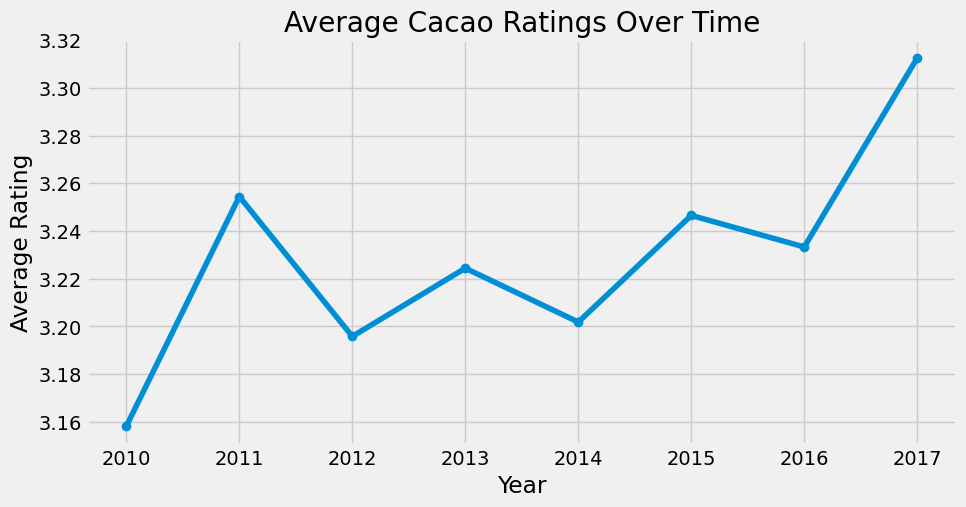

In [35]:
# Plot the Line Chart

plt.figure(figsize=(10,5))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, marker='o', linestyle='-')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Cacao Ratings Over Time")

# Show the plot
plt.show()

## Trend of Average Cacao Ratings Over Time

- **Upward Trend:** Cacao ratings have generally increased from 2010 to 2017.  
- **Fluctuations:** Minor dips in 2012 and 2014, but overall positive growth.  
- **Strong Rise in 2017:** Indicates improved quality or market changes.  

### **Key Takeaway:**  
Cacao ratings show steady improvement with a notable increase in 2017.

# 3. Time series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(yearly_avg_rating, model="additive", period=1)

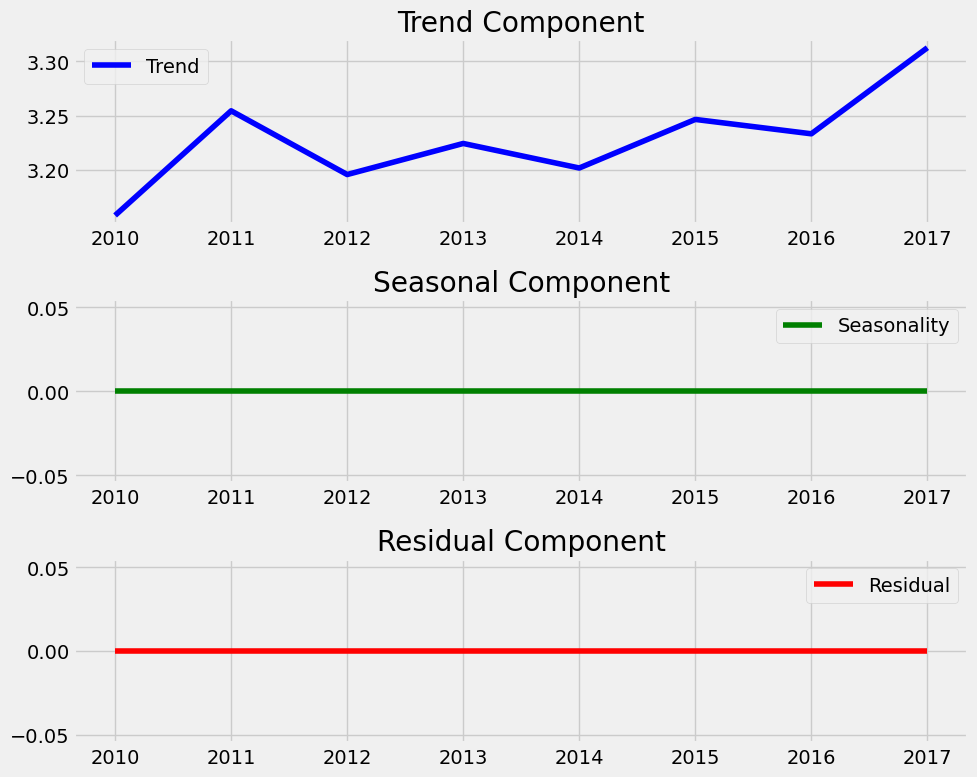

In [45]:
# Plot the decomposed components

plt.figure(figsize=(10,8))

# Trend
plt.subplot(3,1,1)
plt.plot(decomposition.trend, label="Trend", color="blue")
plt.legend()
plt.title("Trend Component")

# Seasonal
plt.subplot(3,1,2)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()
plt.title("Seasonal Component")

# Residual
plt.subplot(3,1,3)
plt.plot(decomposition.resid, label="Residual", color="red")
plt.legend()
plt.title("Residual Component")

plt.tight_layout()
plt.show()

## Analysis of Time Series Decomposition

The decomposition plot provides the following insights:

1. **Trend Component:** The ratings show a **clear upward trend**, indicating an improvement over time. There are minor fluctuations, but the overall movement is positive.  

2. **Seasonal Component:** The seasonality is **flat (zero)**, meaning there are no recurring seasonal patterns. Since the data is yearly, this is expected.  

3. **Residual Component:** The residuals are **flat (zero)**, meaning there is **no significant random variation** left. This suggests that the data mainly follows a trend with minimal unexplained factors.  

### **Key Takeaways:**  
- The cacao ratings have been **steadily increasing** over time.  
- There are **no seasonal patterns** or significant irregular fluctuations.  
- Future modeling should focus on **trend forecasting** rather than seasonal effects.

# 4. Testing for stationarity


In [52]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

# Conduct the ADF test
adf_test = adfuller(yearly_avg_rating)

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

# Print results
print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

ADF Statistic: 1.6406742427023593
p-value: 0.9979746141988409
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


##### **Null Hypothesis (H0):** The time series is not stationary

#### **Conclusion:**
- Since the ADF Statistic (1.64) is greater than all critical values, we fail to reject the null hypothesis (H0).  
- The p-value (0.998) is very high, means the series is not stationary.  
- This suggests that the cacao ratings follow a trend and do not revert to a constant mean.

In [57]:
# Since the data isn't stationary, we applying first-order differencing

diff_series = yearly_avg_rating.diff().dropna()

In [59]:
# Conduct ADF test after differencing
adf_test_diff = adfuller(diff_series)

# Extract results
adf_statistic_diff = adf_test_diff[0]
p_value_diff = adf_test_diff[1]
critical_values_diff = adf_test_diff[4]

# Print results
print(f"ADF Statistic (after differencing): {adf_statistic_diff}")
print(f"p-value: {p_value_diff}")
print("Critical Values:")
for key, value in critical_values_diff.items():
    print(f"   {key}: {value}")

ADF Statistic (after differencing): -6.626687213070463
p-value: 5.852240266769587e-09
Critical Values:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778


##### **Null Hypothesis (H0):** The time series is not stationary.

#### **Conclusion:**
- The ADF Statistic (-6.63) is much lower than all critical values.  
- The p-value (5.85) is very small, meaning we can reject the null hypothesis (H0).  
- This confirms that after first-order differencing, the data is now stationary (weak stationarity (also known as covariance stationarity)).

# 5. Check Data’s Autocorrelations

<Figure size 1000x500 with 0 Axes>

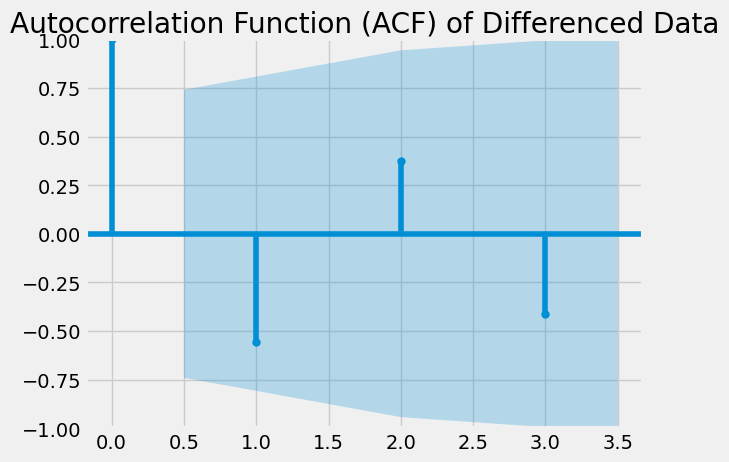

In [94]:
# Plot Autocorrelation Function

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(10,5))
plot_acf(diff_series)
plt.title("Autocorrelation Function (ACF) of Differenced Data")
plt.show()

<Figure size 1000x500 with 0 Axes>

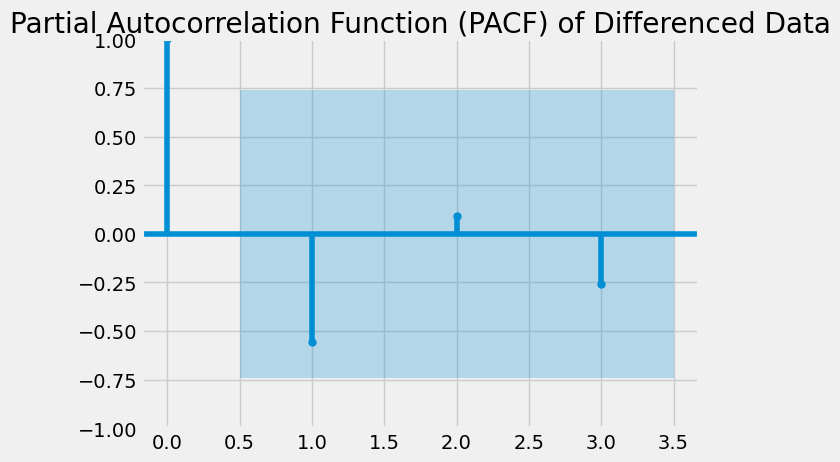

In [98]:
plt.figure(figsize=(10,5))
plot_pacf(diff_series)
plt.title("Partial Autocorrelation Function (PACF) of Differenced Data")
plt.show()

## Observations from ACF and PACF Plots

**Autocorrelation Function (ACF)**: The first lag is significant, but the next lags drop off quickly. This suggests that the data has a short-term correlation but no strong long-term dependence meaning MA(q) process (Moving Average model).

**Partial Autocorrelation Function (PACF)**: The first lag is significant, but after that, it cuts off sharply. This pattern indicates an AR(p) process (Autoregressive model).

#### **Key Takeaways**
- The sharp cutoff in PACF at lag 1 suggests an AR(1) model.
- The ACF suggests a MA(1) process.